In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

from sklearn import metrics

from skimage import io, color

import time
import os
import pickle

import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [3]:
# first 128 words with ?
pickle_in = open('history_bert_based_uncased_first128.pkl', 'rb')
history_first128 = pickle.load(pickle_in)

# splitted into 200 word chunk
pickle_in = open('history_bert_based_uncased_splitted200.pkl', 'rb')
history_splitted200 = pickle.load(pickle_in)

# splitted into 200 word chunk, oversampling 50%
pickle_in = open('history_bert_based_uncased_splitted200_over50.pkl', 'rb')
history_splitted200_over50 = pickle.load(pickle_in)

# splitted into 200 word chunk, oversampling 100%
pickle_in = open('history_bert_based_uncased_splitted200_over100.pkl', 'rb')
history_splitted200_over100 = pickle.load(pickle_in)

# splitted into 200 word chunk, undersampling 50%
pickle_in = open('history_bert_based_uncased_splitted200_under50.pkl', 'rb')
history_splitted200_under50 = pickle.load(pickle_in)

# splitted into 200 word chunk, undersampling 100%
pickle_in = open('history_bert_based_uncased_splitted200_under100.pkl', 'rb')
history_splitted200_under100 = pickle.load(pickle_in)

# splitted into 200 word chunk, undersampling 100%
pickle_in = open('history_bert_based_uncased_splitted200_under100_4.pkl', 'rb')
history_splitted200_under100_4 = pickle.load(pickle_in)

# splitted into 200 word chunk, undersampling 100%
pickle_in = open('history_bert_based_uncased_splitted200_under100_3.pkl', 'rb')
history_splitted200_under100_3 = pickle.load(pickle_in)

In [6]:
def get_stats(history):
    valid_loss = []
    valid_auc = []
    valid_ap = []
    auc_stat = []
    for e in history:
        valid_loss.append(e['Valid. Loss'])
        valid_auc.append(e['Valid. AUC'])
        valid_ap.append(e['Valid. AP'])
        auc_stat.append(e['auc_stat'])
    return valid_loss, valid_auc, valid_ap, auc_stat

In [7]:
loss_splitted, auc_splitted, ap_splitted, stat_splitted = get_stats(history_splitted200)
loss_splitted_over50, auc_splitted_over50, ap_splitted_over50, stat_splitted_over50 = get_stats(history_splitted200_over50)
loss_splitted_over100, auc_splitted_over100, ap_splitted_over100, stat_splitted_over100 = get_stats(history_splitted200_over100)
loss_splitted_under50, auc_splitted_under50, ap_splitted_under50, stat_splitted_under50 = get_stats(history_splitted200_under50)
loss_splitted_under100, auc_splitted_under100, ap_splitted_under100, stat_splitted_under100 = get_stats(history_splitted200_under100)


loss_splitted_under100_4, auc_splitted_under100_4, ap_splitted_under100_4, stat_splitted_under100_4 = get_stats(history_splitted200_under100_4)
loss_splitted_under100_3, auc_splitted_under100_3, ap_splitted_under100_3, stat_splitted_under100_3 = get_stats(history_splitted200_under100_3)

/home/yz6126/pyenv/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


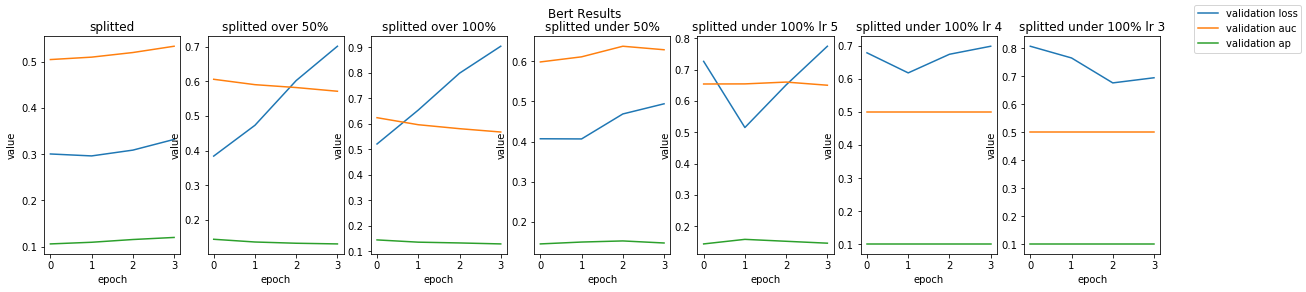

In [8]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(20, 4))
fig.suptitle('Bert Results')

ax1.plot(loss_splitted, label='validation loss')
ax1.plot(auc_splitted, label='validation auc')
ax1.plot(ap_splitted, label='validation ap')
ax1.set_title('splitted')
ax1.set_xlabel('epoch')
ax1.set_ylabel('value')

ax2.plot(loss_splitted_over50, label='validation loss')
ax2.plot(auc_splitted_over50, label='validation auc')
ax2.plot(ap_splitted_over50, label='validation ap')
ax2.set_title('splitted over 50%')
ax2.set_xlabel('epoch')
ax2.set_ylabel('value')

ax3.plot(loss_splitted_over100, label='validation loss')
ax3.plot(auc_splitted_over100, label='validation auc')
ax3.plot(ap_splitted_over100, label='validation ap')
ax3.set_title('splitted over 100%')
ax3.set_xlabel('epoch')
ax3.set_ylabel('value')

ax4.plot(loss_splitted_under50, label='validation loss')
ax4.plot(auc_splitted_under50, label='validation auc')
ax4.plot(ap_splitted_under50, label='validation ap')
ax4.set_title('splitted under 50%')
ax4.set_xlabel('epoch')
ax4.set_ylabel('value')

ax5.plot(loss_splitted_under100, label='validation loss')
ax5.plot(auc_splitted_under100, label='validation auc')
ax5.plot(ap_splitted_under100, label='validation ap')
ax5.set_title('splitted under 100% lr 5')
ax5.set_xlabel('epoch')
ax5.set_ylabel('value')


ax6.plot(loss_splitted_under100_4, label='validation loss')
ax6.plot(auc_splitted_under100_4, label='validation auc')
ax6.plot(ap_splitted_under100_4, label='validation ap')
ax6.set_title('splitted under 100% lr 4')
ax6.set_xlabel('epoch')
ax6.set_ylabel('value')

ax7.plot(loss_splitted_under100_3, label='validation loss')
ax7.plot(auc_splitted_under100_3, label='validation auc')
ax7.plot(ap_splitted_under100_3, label='validation ap')
ax7.set_title('splitted under 100% lr 3')
ax7.set_xlabel('epoch')
ax7.set_ylabel('value')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='best')

fig.show()

best epoch: splitted under 100% lr 5, epoch no.2

In [14]:
auc_splitted_under100[2], ap_splitted_under100[2]

(0.6601649727485325, 0.1519762071271495)

In [9]:
probas_list = stat_splitted_under100[2]['probas_list'].to_numpy().reshape(-1, 1)
probas_list = np.concatenate((1-probas_list, probas_list), axis=1)

truelabels_list = stat_splitted_under100[2]['truelabels_list'].to_numpy()
preds_list = stat_splitted_under100[2]['preds_list']

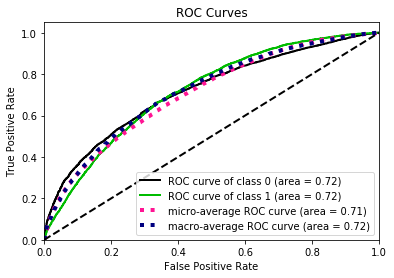

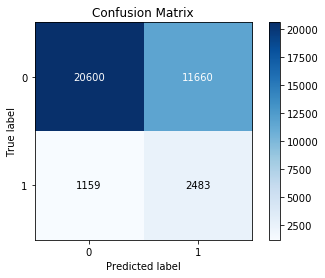

In [10]:
skplt.metrics.plot_roc(truelabels_list, probas_list)
skplt.metrics.plot_confusion_matrix(truelabels_list, preds_list)